# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

Autoencoders are really cool and powerful. You can encode data into lower dimensional space, like we did, and find better clusters than we initially created, which is quite an amazing result! You can also use the decoder to create new datasets in a generative approach by sampling inside your latent space.

Autoencoders can be used as compression algorithms, where the decoder recovers a compressed file, like a photo. They can also be used to denoise data -- by adding noise to input, and learning to recreate the noise-free data, you can achieve this.

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

We are going to use scikit learns make_blobs function which makes distributions of data depending on the parameters that you give it. What it gives back is the X values (location) and y (cluster labels)


In [4]:
# 50 dimensions, 20 clusters
X, y = make_blobs(n_features=50, centers=20, n_samples=20000, cluster_std=0.2, center_box=[-1,1], random_state=17)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [6]:
# We will use PCA to create a model as a baseline to see our performance (of how well we can reduce the dimensionality of the data set)

In [7]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

In [8]:
# So now its 2 dimensional - so we can plot on a scatter plot to visualise how pca has performed.
res_pca.shape

(2000, 2)

Text(0,0.5,'Principal Component 2')

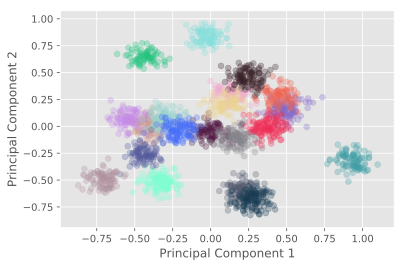

In [9]:
# We want to loop over our clusters, 
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training

* In a normal neural network (supervised learning problem) each node is a non-linear activation function and each line is a weighted sum.
* Autoencoders are used in unsupervised learning, and contain fully connected layers and then a bottle neck in the middle. This is to force the net to create a representation of the data in a small matrix of weights and dimensions (the number of nodes in the middle layer = the number of dimensions the represenation is reduced to)
* So the model is trained to reproduce its input, but in the process, it learns a low dimensional representation of the data
* its helpful also as you can define a loss function as the difference between the true input and the decoded / predicted input
* kind of like making a cartoon from a photograph - the meaning is enhanced by its similicity

In [13]:
# no longer a classification task - it becomes regression because the input is a matrix of real values and we want to predict a vector of real values (matrix)
# alpha=learning rate - defined how much the model moves in the direction of minimising that function (hyperparameter)
# hidden_layer_sizes - tuple containing the number of nodes in each direction.  the 2 is the 2d representation that we want. The sixe of the other layers was totally unexplianed.
# common in autoencoders is to have a mirrored architecture - makes sense
autoencoder = MLPRegressor(alpha=1e-15,
                           hidden_layer_sizes=(50,100,50,2, 50, 100, 50),
                           random_state= 1,
                           max_iter=20000)

#input and output are training data
autoencoder.fit(X_train, X_train)

TypeError: __init__() got an unexpected keyword argument 'deep'

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [12]:
autoencoder

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [14]:
import sklearn
sklearn.__version__

'0.23.1'